In [25]:
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import random
import datetime
import pandas as pd

In [47]:
def random_date(start, end, max_times):
    current = start
    while max_times >=0 and current < end:
        if random.random() > 0.999:
            current = current + datetime.timedelta(minutes=1440)
            yield current
        else:
            current = current + datetime.timedelta(minutes=random.randrange(60))
            yield current
        max_times-=1

In [48]:
startDate = datetime.datetime(2017, 1, 1, 0, 0)
endDate = datetime.datetime(2017, 6, 1, 0, 0)

In [49]:
times = [i for i in random_date(startDate, endDate, 1000000)]
len(times)

7060

In [50]:
events = ['login', 'view_data', 'export_data']

In [51]:
df = pd.DataFrame({
        'timestamp': times, 
        'events': [random.choice(events) for _ in range(len(times))],
#         'user': ['Ash']*len(times)
    })

In [52]:
df.head()

,events,timestamp
0,view_data,2017-01-01 00:56:00
1,view_data,2017-01-01 01:35:00
2,view_data,2017-01-01 02:19:00
3,view_data,2017-01-01 02:19:00
4,view_data,2017-01-01 03:14:00


In [53]:
df.set_index('timestamp', inplace=True)
df.head()

,events
timestamp,
2017-01-01 00:56:00,view_data
2017-01-01 01:35:00,view_data
2017-01-01 02:19:00,view_data
2017-01-01 02:19:00,view_data
2017-01-01 03:14:00,view_data


In [54]:
# u = df.groupby('user')

In [55]:
df_daily = df['events'].resample('1D').count()
df_daily.head()

timestamp
2017-01-01    52
2017-01-02    48
2017-01-03    47
2017-01-04    41
2017-01-05     5
Freq: D, Name: events, dtype: int64

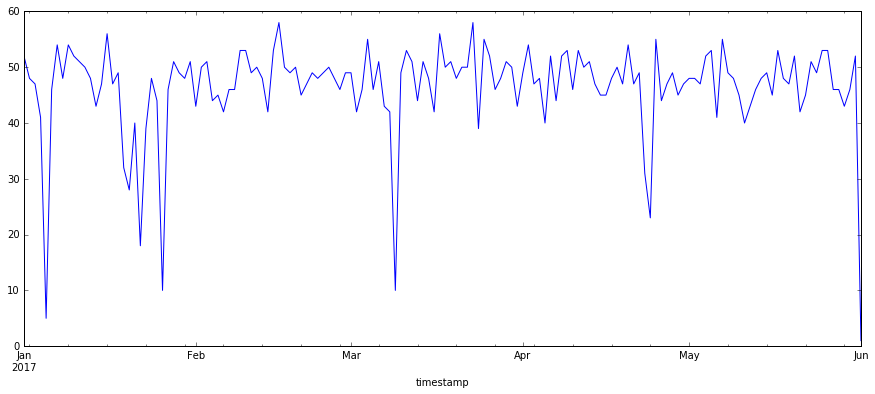

In [56]:
df_daily.plot()

In [57]:
df_daily.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-05-23', '2017-05-24', '2017-05-25', '2017-05-26',
               '2017-05-27', '2017-05-28', '2017-05-29', '2017-05-30',
               '2017-05-31', '2017-06-01'],
              dtype='datetime64[ns]', name='timestamp', length=152, freq='D')

In [63]:
#Determing rolling statistics
rolmean = df_daily.ewm(halflife=10).mean()
rolstd = df_daily.rolling(center=False, window=10).std()

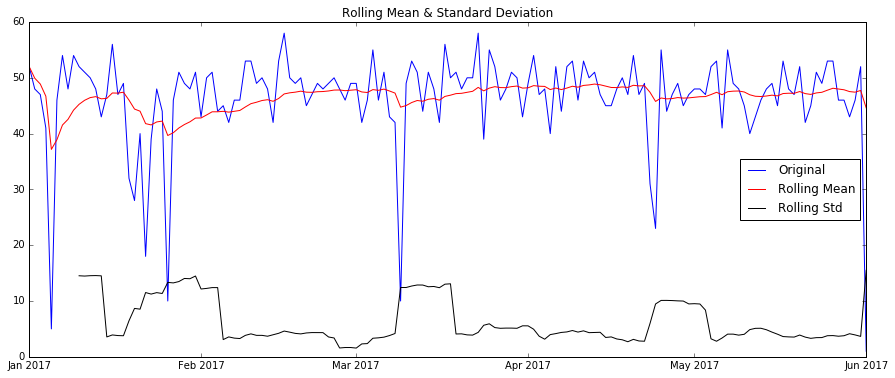

In [64]:
orig = plt.plot(df_daily, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [60]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df_daily, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -9.454185e+00
p-value                        4.531459e-16
#Lags Used                     0.000000e+00
Number of Observations Used    1.510000e+02
Critical Value (5%)           -2.880878e+00
Critical Value (1%)           -3.474416e+00
Critical Value (10%)          -2.577081e+00
dtype: float64


In [69]:
import statsmodels.api as sm

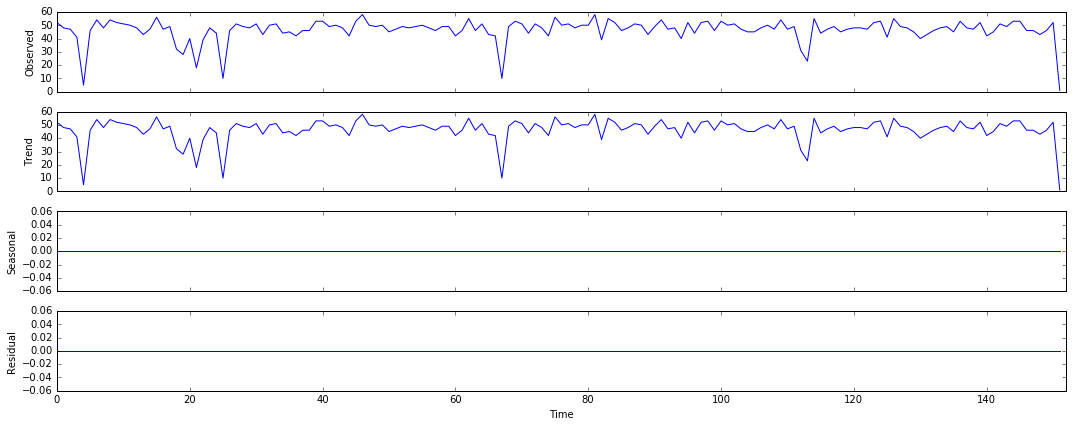

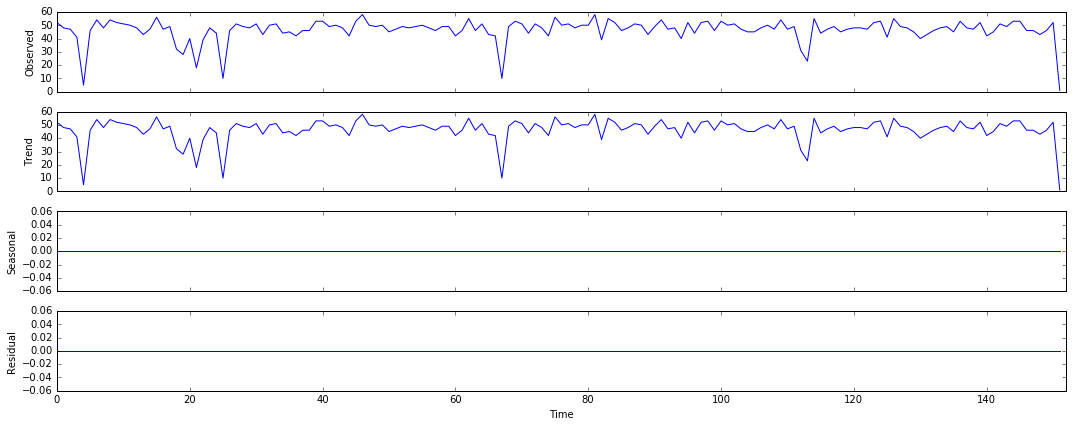

In [74]:
res= sm.tsa.seasonal_decompose(df_daily.values, freq=1)
res.plot()